<a href="https://colab.research.google.com/github/TechnoDk/My-Project-With-Data-Science/blob/main/Admission_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Chance of Admission for Higher Studies.**

Predict the chances of admission of a student to a Graduate program based on:

1.GRE Scores (290 to 340)

2.TOEFL Scores (92 to 120)

3.University Rating (1 to 5)

4.Statement of Purpose (1 to 5)

5.Letter of Recommendation Strength (1 to 5)

6.Undergraduate CGPA (6.8 to 9.92)

7.Research Experience (0 or 1)

8.Chance of Admit (0.34 to 0.97)

In [12]:
#step1 : import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#step 2:import data
admission = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')

In [14]:
#view data
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
#info of data
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [16]:
# summary statistics
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [17]:
# check for missing value
admission.isna().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
# check for categories
admission.nunique()

Serial No            400
GRE Score             49
TOEFL Score           29
University Rating      5
 SOP                   9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [19]:
# correlation
admission.corr()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


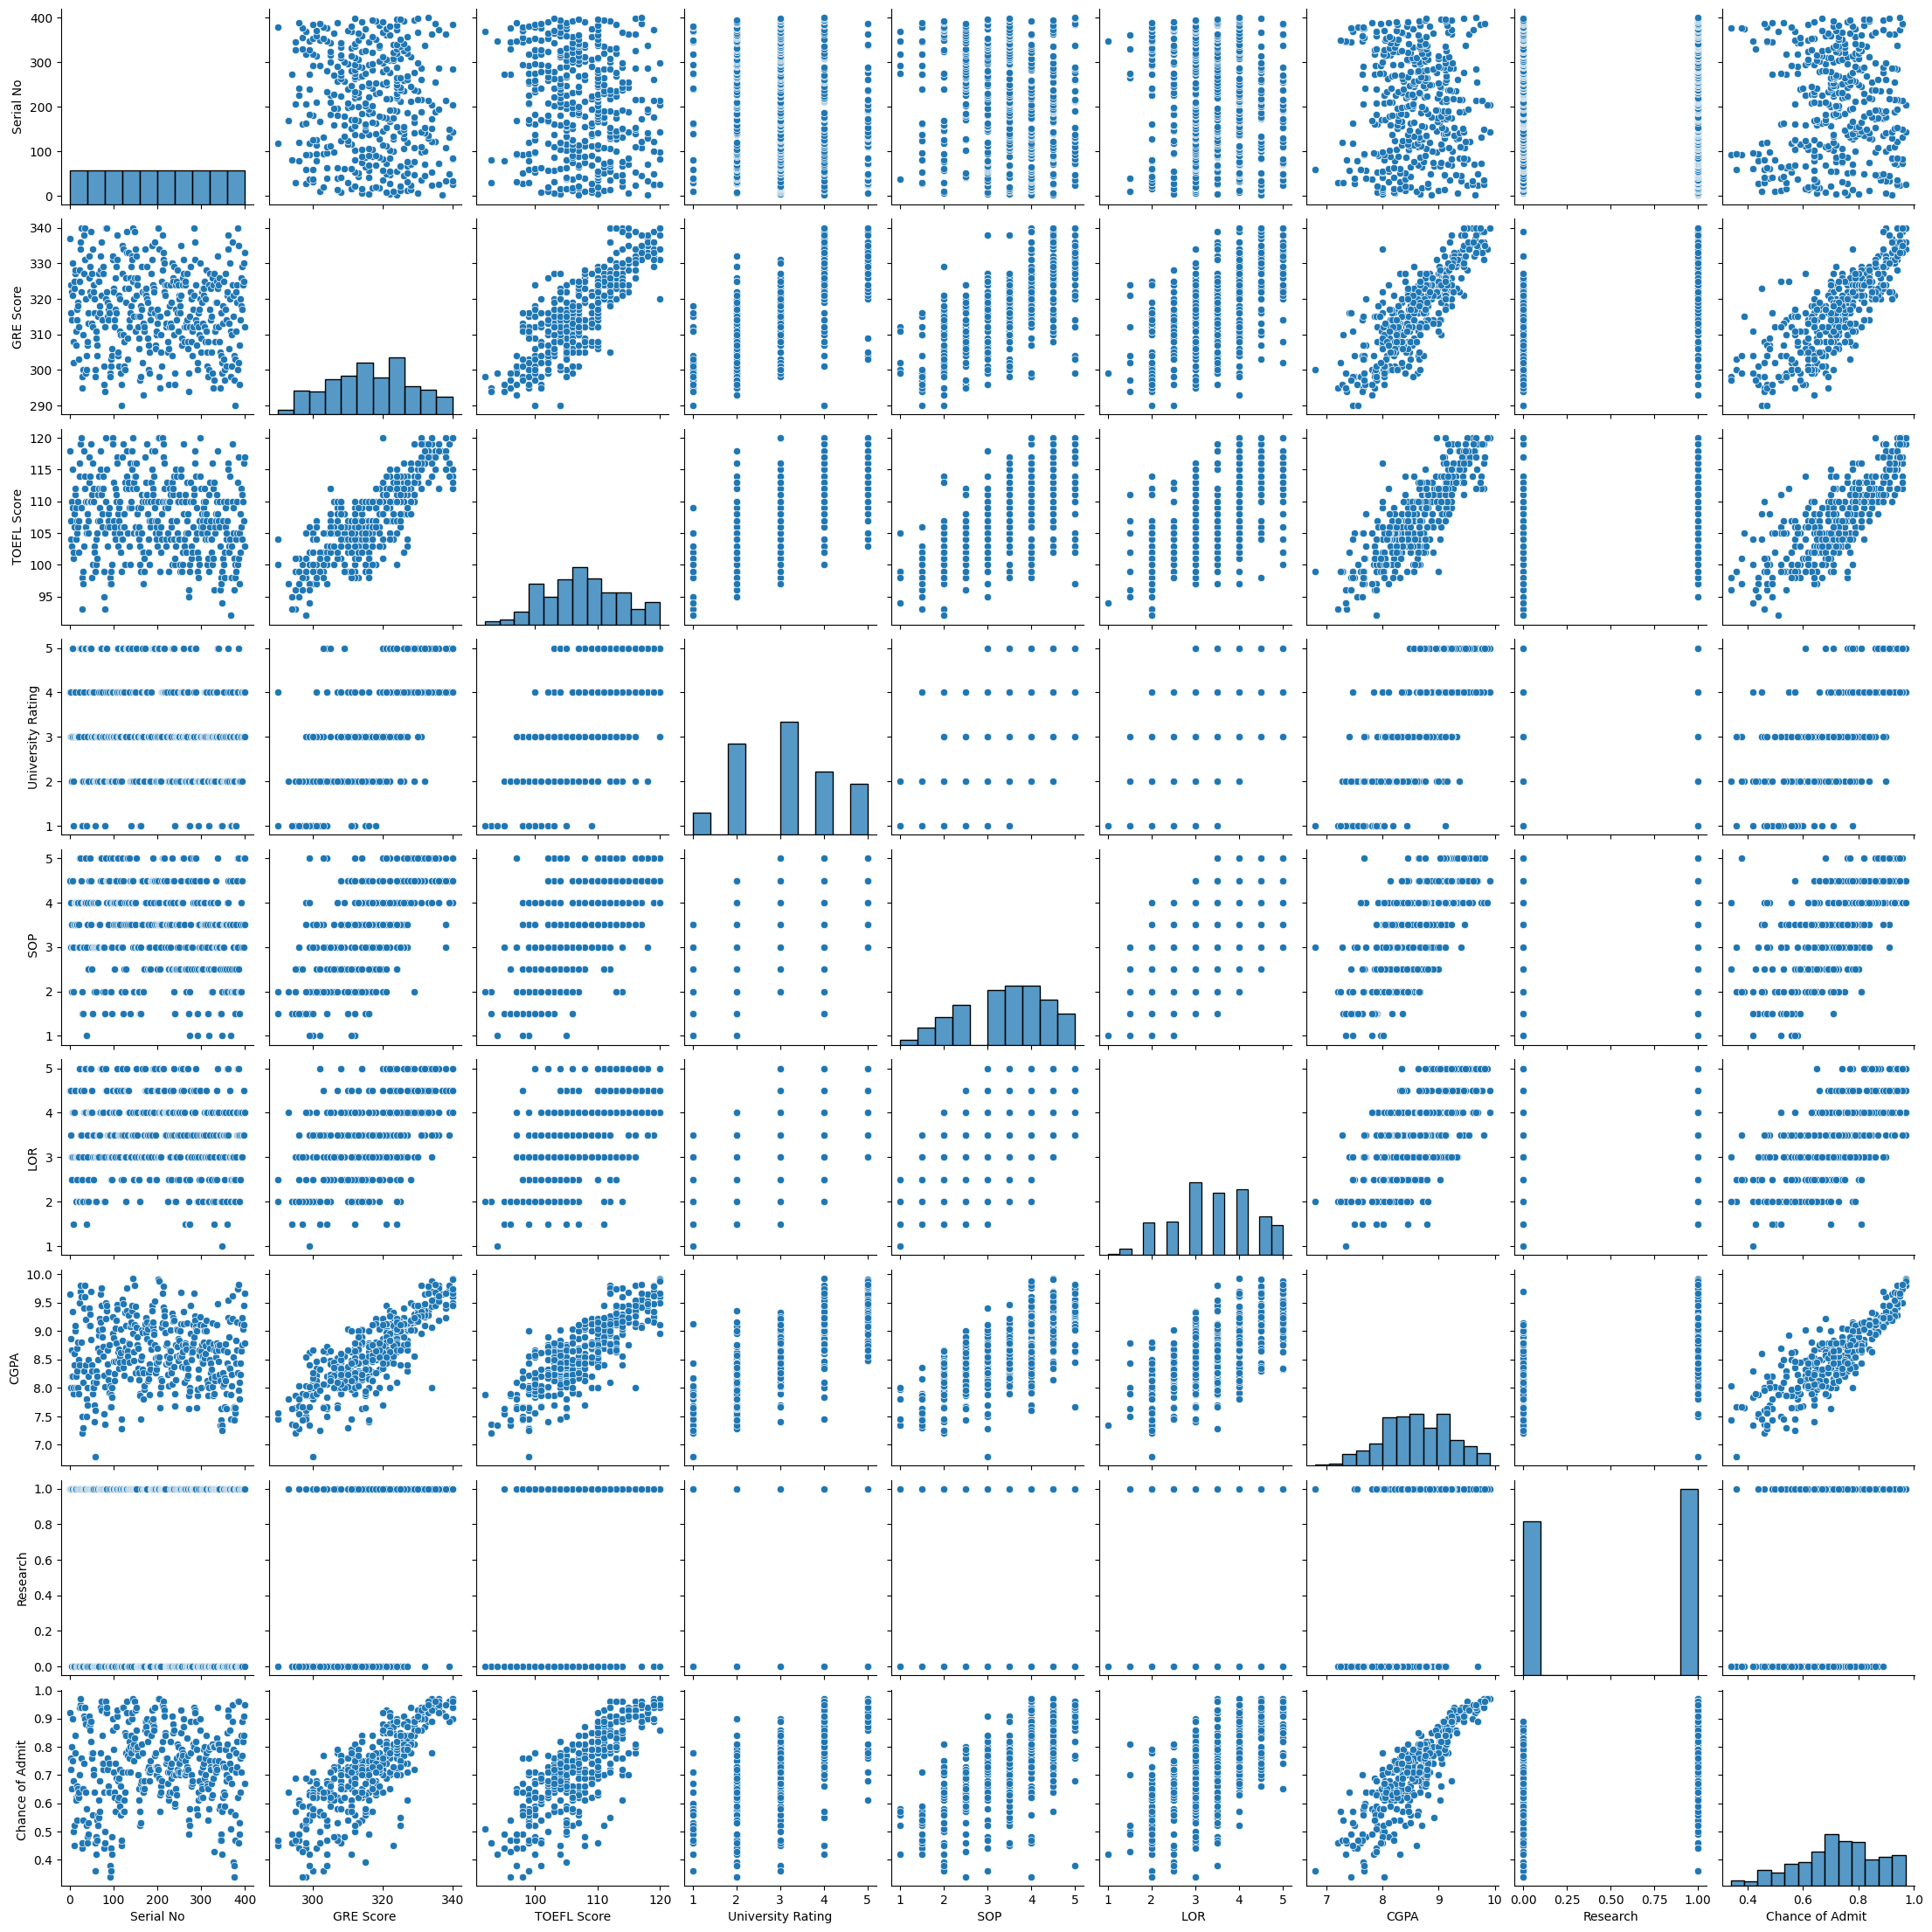

In [22]:
#visualize pairplot
sns.pairplot(admission)

step 3: define target (y) and feature (x)

In [23]:
admission.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
y = admission['Chance of Admit ']

In [25]:
 X = admission.drop(['Serial No','Chance of Admit '],axis=1)

In [38]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [27]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

In [28]:
# Step 5 : select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.intercept_

-1.2831244932033998

In [31]:
model.coef_

array([ 0.00204057,  0.00287273,  0.00566887, -0.00380559,  0.01973175,
        0.11314449,  0.02061553])

In [32]:
# Step 7 : predict model
y_pred = model.predict(X_test)

In [33]:
y_pred

array([0.71426327, 0.72534136, 0.69677103, 0.66566584, 0.57483872,
       0.93087527, 0.93701113, 0.72361387, 0.81130158, 0.62223963,
       0.59629648, 0.80084072, 0.52537944, 0.79174558, 0.84064992,
       0.66429594, 0.65136589, 0.66990687, 0.75794085, 0.86072023,
       0.66088101, 0.85570763, 0.84777425, 0.95033179, 0.68750762,
       0.65907671, 0.65279623, 0.5709259 , 0.55895645, 0.57990205,
       0.54497918, 0.7570717 , 0.69682571, 0.77286067, 0.64320811,
       0.5183554 , 0.43816818, 0.84654064, 0.90398354, 0.80517781,
       0.72218971, 0.72882587, 0.68145136, 0.88592237, 0.77208852,
       0.78778085, 0.95526121, 0.88586486, 0.59980416, 0.50690214,
       0.59947098, 0.63380406, 0.82841217, 0.44911724, 0.71068577,
       0.77335748, 0.68851557, 0.64486026, 0.85537724, 0.65517768,
       0.65046031, 0.90818978, 0.63422429, 0.68658606, 0.72150268,
       0.69030545, 0.59381287, 0.93813035, 0.58997351, 0.91542587,
       0.59283415, 0.93351713, 0.59478751, 0.71380389, 0.54346

In [34]:
# Step 8 : model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [35]:
mean_absolute_error(y_test,y_pred)

0.04400128934232651

In [36]:
mean_absolute_percentage_error(y_test,y_pred)

0.07575278864605438

In [37]:
mean_squared_error(y_test,y_pred)

0.004038263715495693